Time Series Classification
An interesting task in machine learning is classification of time series. In this problem,we will classify the activities of humans based on time series obtained by a WirelessSensor Network

In [3]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;


(A)
Download the AReM data from:https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29. The dataset contains 7 folders that represent seven types of activities. Ineach folder, there are multiple files each of which represents an instant of a humanperforming an activity.1Each file containis 6 time series collected from activitiesof the same person, which are called avgrss12, varrss12, avgrss13, varrss13,vgrss23, and arrss23. There are 88 instances in the dataset, each of which con-tains 6 time series and each time series has 480 consecutive values.

(B)
Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data.

(C)
Feature Extraction Classification of time series usually needs extracting features from them. In thisproblem, we focus on time-domain features.i.Research what types of time-domain features are usually used in time seriesclassification and list them (examples are minimum, maximum, mean, etc).ii.Extract the time-domain features minimum, maximum, mean, median, stan-dard deviation, first quartile, and third quartile for all of the 6 time seriesin each instance. You are free to normalize/standardize features or use themdirectly.

In [13]:


import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.ticker import MultipleLocator
from itertools import cycle
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [14]:
column=["Columns","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
training_set={}
test_set={}

In [15]:
data={}
inum=1
feature={}
it=1
test_set["bending1"]=[]
training_set["bending1"]=[]
for i in range(1,8):
    data[it]=pd.read_csv("https://raw.githubusercontent.com/akshaybhatia95/arem/master/bending1/dataset"+str(i)+".csv",sep=",",names=column,header=4)
    if i in [1,2]:
        
        test_set["bending1"].append(data[it])
    else:
        
        training_set["bending1"].append(data[it])
    data_max=data[it].max()
    data_min=data[it].min()
    data_mean=data[it].mean()
    data_median=data[it].median()
    data_sd=data[it].std()
    data_fq=data[it].quantile(0.25)
    data_tq=data[it].quantile(0.75)
    tmp=[]
    for j in range(1,7):
        tmp.append(data_max[j])
        tmp.append(data_min[j])
        tmp.append(data_mean[j])
        tmp.append(data_median[j])
        tmp.append(data_sd[j])
        tmp.append(data_fq[j])
        tmp.append(data_tq[j])
    feature[it]=tmp
    it+=1


In [16]:
test_set["bending2"]=[]
training_set["bending2"]=[]
for i in range(1,7):
    if i!=4:
            data[it]=pd.read_csv("https://raw.githubusercontent.com/akshaybhatia95/arem/master/bending2/dataset"+str(i)+".csv",sep=",",names=column,header=4)
    else:
            data[it]=pd.read_csv("https://raw.githubusercontent.com/akshaybhatia95/arem/master/bending2/dataset"+str(i)+".csv",sep=" ",names=column,header=4)
    if i in [1,2]:
        
        test_set["bending2"].append(data[it])
    else:
        
        training_set["bending2"].append(data[it])
    data_max=data[it].max()
    data_min=data[it].min()
    data_mean=data[it].mean()
    data_median=data[it].median()
    data_sd=data[it].std()
    data_fq=data[it].quantile(0.25)
    data_tq=data[it].quantile(0.75)
    tmp=[]
    for j in range(1,7):
        tmp.append(data_max[j])
        tmp.append(data_min[j])
        tmp.append(data_mean[j])
        tmp.append(data_median[j])
        tmp.append(data_sd[j])
        tmp.append(data_fq[j])
        tmp.append(data_tq[j])
    feature[it]=tmp
    it+=1

In [17]:
folders=["cycling","lying","sitting","standing","walking"]
for folder in folders:
    test_set[folder]=[]
    training_set[folder]=[]
#     print(folder)
    for j in range(1,16):
#         print(folder ,"dataset"+str(j))
        data[it]=pd.read_csv("https://raw.githubusercontent.com/akshaybhatia95/arem/master/"+folder+"/dataset"+str(j)+".csv",sep=",",names=column,header=5,error_bad_lines=False)
        if j in [1,2,3]:
            test_set[folder].append(data[it])
        else:
            training_set[folder].append(data[it])
        data_max=data[it].max()
        data_min=data[it].min()
        data_mean=data[it].mean()
        data_median=data[it].median()
        data_sd=data[it].std()
        data_fq=data[it].quantile(0.25)
        data_tq=data[it].quantile(0.75)
        tmp=[]
        for j in range(1,7):
            tmp.append(data_max[j])
            tmp.append(data_min[j])
            tmp.append(data_mean[j])
            tmp.append(data_median[j])
            tmp.append(data_sd[j])
            tmp.append(data_fq[j])
            tmp.append(data_tq[j])
        feature[it]=tmp
        it+=1

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [18]:
featured_colums=[]
for i in range(1,7):
    featured_colums.append("max"+str(i))
    featured_colums.append("min"+str(i))
    featured_colums.append("mean"+str(i))
    featured_colums.append("median"+str(i))
    featured_colums.append("standard deviation"+str(i))
    featured_colums.append("first quartile"+str(i))
    featured_colums.append("third quartile"+str(i))
featured_colums

['max1',
 'min1',
 'mean1',
 'median1',
 'standard deviation1',
 'first quartile1',
 'third quartile1',
 'max2',
 'min2',
 'mean2',
 'median2',
 'standard deviation2',
 'first quartile2',
 'third quartile2',
 'max3',
 'min3',
 'mean3',
 'median3',
 'standard deviation3',
 'first quartile3',
 'third quartile3',
 'max4',
 'min4',
 'mean4',
 'median4',
 'standard deviation4',
 'first quartile4',
 'third quartile4',
 'max5',
 'min5',
 'mean5',
 'median5',
 'standard deviation5',
 'first quartile5',
 'third quartile5',
 'max6',
 'min6',
 'mean6',
 'median6',
 'standard deviation6',
 'first quartile6',
 'third quartile6']

In [19]:

final_features=pd.DataFrame.from_dict(feature,orient="index",columns=featured_colums)
print(final_features)


     max1   min1      mean1  median1  standard deviation1  first quartile1  \
1   45.00  37.25  40.624792    40.50             1.476967          39.2500   
2   45.67  38.00  42.812812    42.50             1.435550          42.0000   
3   47.40  35.00  43.954500    44.33             1.558835          43.0000   
4   47.75  33.00  42.179813    43.50             3.670666          39.1500   
5   45.75  33.00  41.678063    41.75             2.243490          41.3300   
6   48.00  37.00  43.454958    43.25             1.386098          42.5000   
7   48.00  36.25  43.969125    44.50             1.618364          43.3100   
8   51.00  12.75  24.562958    24.25             3.737514          23.1875   
9   42.75   0.00  27.464604    28.00             3.583582          25.5000   
10  50.00  21.00  32.586208    33.00             6.238143          26.1875   
11   1.00   0.00   0.256438     0.00             0.275833           0.0000   
12  45.50  19.00  30.938104    29.00             7.684146       

C(iii) Estimate the standard deviation of each of the time-domain features youextracted from the data. Then, use Python’s bootstrapped or any othermethod to build a 90% bootsrap confidence interval for the standard deviationof each feature.

In [20]:
all_std=final_features.std()
all_std_df= pd.DataFrame(all_std,columns=["Std. Deviation"])

In [21]:
for i in final_features:
    col=bs.bootstrap(np.array(final_features[i]),stat_func=bs_stats.std,alpha=0.05)
    all_std_df.loc[i,"Confidence Interval"]=col.value
    

In [22]:
all_std_df

Std. Deviation  Confidence Interval
max1                       6.334222             6.298129
min1                      10.057319            10.000011
mean1                      6.678646             6.640591
median1                    6.775972             6.737362
standard deviation1        1.783854             1.773689
first quartile1            7.265638             7.224238
third quartile1            6.632462             6.594670
max2                       5.104948             5.075860
min2                       0.000000             0.000000
mean2                      1.723112             1.713294
median2                    1.613917             1.604720
standard deviation2        0.917260             0.912033
first quartile2            1.069170             1.063078
third quartile2            2.336757             2.323442
max3                       5.163595             5.134173
min3                       2.956462             2.939616
mean3                      4.219326             4.195284
median3                    4.264164             4.239867
standard deviation3        0.996369             0.990692
first quartile3            4.359904             4.335061
third quartile3            4.472004             4.446523
max4                       2.799135             2.783185
min4                       1.172604             1.165922
mean4                      2.117194             2.105130
median4                    2.112951             2.100911
standard deviation4        0.462587             0.459951
first quartile4            1.926959             1.915980
third quartile4            2.381406             2.367837
max5                       6.050019             6.015545
min5                       6.105679             6.070888
mean5                      5.901075             5.867451
median5                    6.042500             6.008069
standard deviation5        1.059259             1.053223
first quartile5            6.247163             6.211566
third quartile5            5.840830             5.807548
max6                       2.526475                  NaN
min6                       0.046101                  NaN
mean6                      1.157753                  NaN
median6                    1.090450                  NaN
standard deviation6        0.516838                  NaN
first quartile6            0.763439                  NaN
third quartile6            1.527383                  NaN

C(IV)
Use your judgement to select the three most important time-domain features(one option may be min, mean, and max).

I have selected max,min and mean.

(d)Binary Classification Using Logistic Regression

Assume that you want to use the training set to classify bending from otheractivities, i.e. you have a binary classification problem. Depict scatter plotsof the features you specified in 1(c)iv extracted from time series 1, 2, and 6 ofeach instance, and use color to distinguish bending vs. other activities. (Seep. 129 of the textbook).

In [23]:
activities=["bending1","bending2","cycling","lying","sitting","standing","walking"]
count=1
it=1
training_features={}
for activity in activities:
    for j in range(0,len(training_set[activity])):
        curr_data=training_set[activity][j]
        curr_max=curr_data.max()
        curr_min=curr_data.min()
        curr_mean=curr_data.mean()
#         print(curr_max)
        ans_list=[]
        for k in range(1,7):
            if k in [1,2,6]:
                ans_list.append(curr_min[k])
                ans_list.append(curr_max[k])
                ans_list.append(curr_mean[k])
        training_features[it]=ans_list
        it+=1

# print(training_features)   
featured_columns_training=[]
for i in range(1,7):
    if i in[1,2,6]:
        featured_columns_training.append("min"+str(i))
        featured_columns_training.append("max"+str(i))
        featured_columns_training.append("mean"+str(i))
# featured_columns_training

final_features_training=pd.DataFrame.from_dict(training_features,orient="index",columns=featured_columns_training)
print(final_features_training)

     min1   max1      mean1  min2   max2     mean2  min6   max6     mean6
1   35.00  47.40  43.954500   0.0   1.70  0.426250  0.00   1.79  0.493292
2   33.00  47.75  42.179813   0.0   3.00  0.696042  0.00   2.18  0.613521
3   33.00  45.75  41.678063   0.0   2.83  0.535979  0.00   1.79  0.383292
4   37.00  48.00  43.454958   0.0   1.58  0.378083  0.00   5.26  0.679646
5   36.25  48.00  43.969125   0.0   1.50  0.413125  0.00   2.96  0.555313
6   21.00  50.00  32.586208   0.0   9.90  0.516125  0.00  13.61  1.162042
7    0.00   1.00   0.256438   0.0  14.50  8.166250   NaN    NaN       NaN
8   19.00  45.50  30.938104   0.0   6.40  0.467167  0.00   6.73  1.107354
9   25.00  47.50  31.058250   0.0   6.38  0.405458  0.00   4.92  1.098104
10  19.00  44.00  36.219478   0.0  12.28  2.832171  0.00   9.98  3.481106
11  26.50  44.33  36.681775   0.0  12.89  2.974322  0.00   8.19  3.073048
12  25.33  45.00  37.114551   0.0  10.84  2.733612  0.00   9.50  3.078246
13  26.75  44.75  36.872484   0.0  11.

<Figure size 720x720 with 0 Axes>

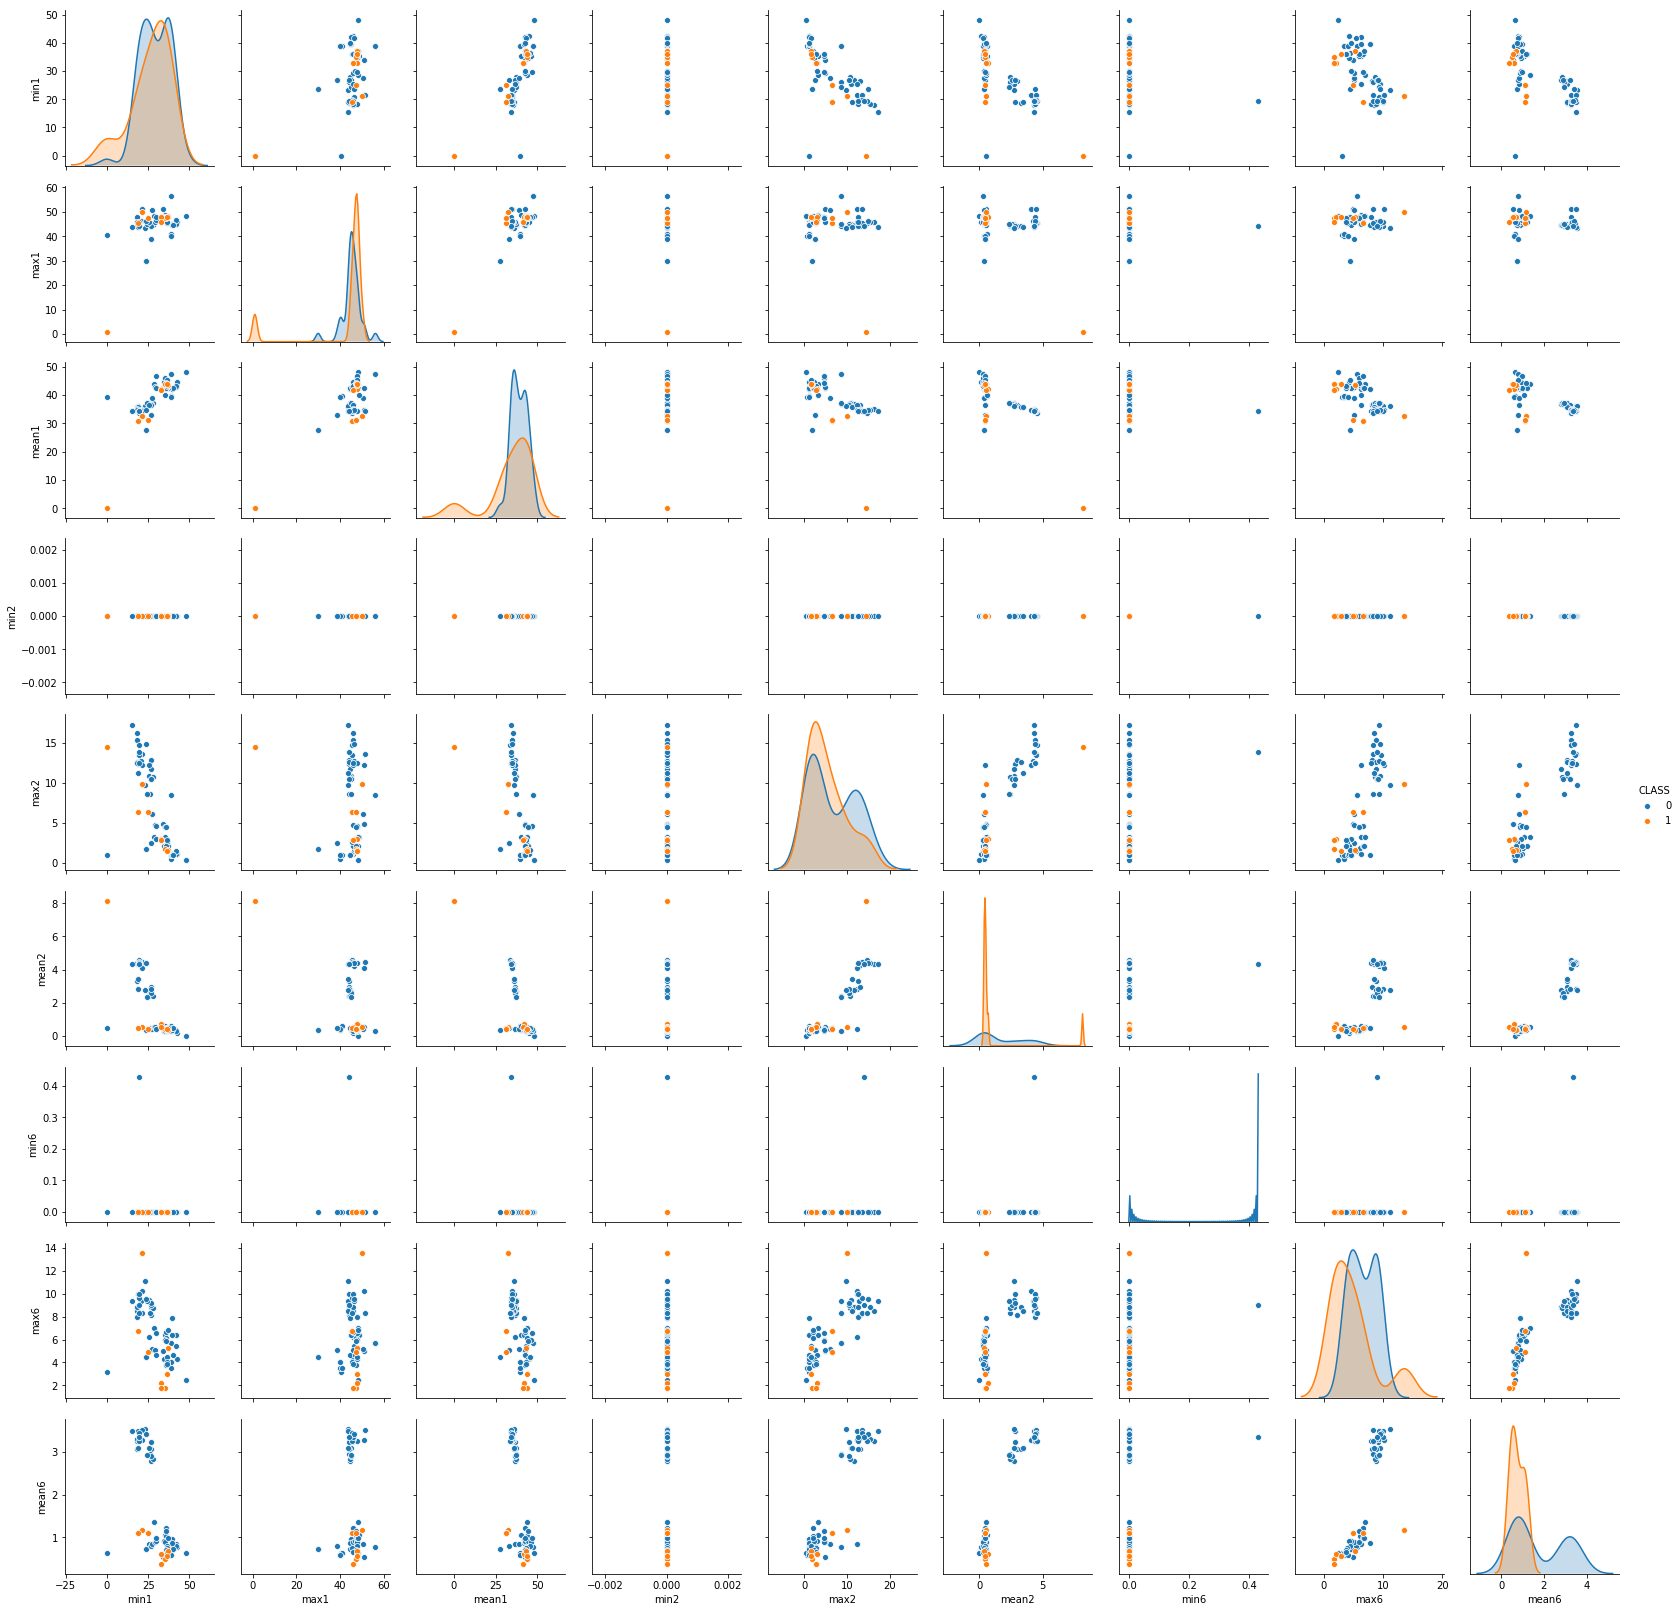

In [24]:

train_bending_class = [1 if i < 10 else 0 for i in range(1, 70)]
final_features_training["CLASS"] = train_bending_class

plt.figure(figsize=(10,10))
sns.pairplot(final_features_training,hue="CLASS",vars=featured_columns_training,diag_kind='kde')
plt.show()

ii.Break each time series in your training set into two (approximately) equallength time series. Now instead of 6 time series for each of the traininginstances, you have 12 time series for each training instance. Repeat theexperiment in 1(d)i, i.e depict scatter plots of the features extracted from bothparts of the time series 1,2, and 12. Do you see any considerable differencein the results with those of 1(d)i?

In [25]:
activities=["bending1","bending2","cycling","lying","sitting","standing","walking"]
count=1
it=1
training_features={}
for activity in activities:
    for j in range(0,len(training_set[activity])):
        curr_data=training_set[activity][j]
#         split_data=np.array_split(curr_data,2)
        curr_data1=curr_data[0:240]
        curr_data2=curr_data[240:len(curr_data)]
        
#         curr_data_new=pd.concat([curr_data1,curr_data2],axis=1)
        curr_max=curr_data1.max()
        curr_min=curr_data1.min()
        curr_mean=curr_data1.mean()
        curr_max2=curr_data2.max()
        curr_min2=curr_data2.min()
        curr_mean2=curr_data2.mean()
        ans_list=[]
        for k in range(1,7):
            if k in [1,2]:
                ans_list.append(curr_min[k])
                ans_list.append(curr_max[k])
                ans_list.append(curr_mean[k])
            if k in [6]:
                ans_list.append(curr_min2[k])
                ans_list.append(curr_max2[k])
                ans_list.append(curr_mean2[k])
        training_features[it]=ans_list
        it+=1

# print(training_features)   
featured_columns_training=[]
for i in range(1,7):
    if i in[1,2,6]:
        featured_columns_training.append("min"+str(i))
        featured_columns_training.append("max"+str(i))
        featured_columns_training.append("mean"+str(i))
# featured_columns_training

final_features_training=pd.DataFrame.from_dict(training_features,orient="index",columns=featured_columns_training)
print(final_features_training)

     min1   max1      mean1  min2   max2     mean2  min6   max6     mean6
1   36.50  46.50  44.057167   0.0   1.50  0.381042  0.00   1.50  0.388333
2   33.75  47.75  43.278875   0.0   3.00  0.673292  0.00   2.18  0.586083
3   33.00  45.75  41.621208   0.0   2.83  0.623083  0.00   1.50  0.347500
4   39.00  48.00  44.117042   0.0   1.30  0.250042  0.00   4.06  0.543875
5   36.67  45.00  43.486208   0.0   1.30  0.378667  0.00   2.96  0.585750
6   21.00  50.00  32.014375   0.0   9.90  0.587875  0.00   6.02  0.786042
7    0.00   1.00   0.298958   0.0  14.50  7.057208   NaN    NaN       NaN
8   19.00  39.25  29.189875   0.0   4.33  0.497042  0.00   5.61  1.114917
9   25.00  47.50  34.110625   0.0   6.38  0.528500  0.00   4.92  1.199958
10  26.00  44.00  36.183917   0.0   9.65  2.747958  0.00   8.61  3.462678
11  28.00  43.33  36.506792   0.0  10.85  2.884875  0.00   8.19  3.013138
12  27.80  44.67  37.063667   0.0  10.50  2.794333  0.00   9.50  3.241841
13  26.75  44.50  36.844333   0.0  11.

<Figure size 720x720 with 0 Axes>

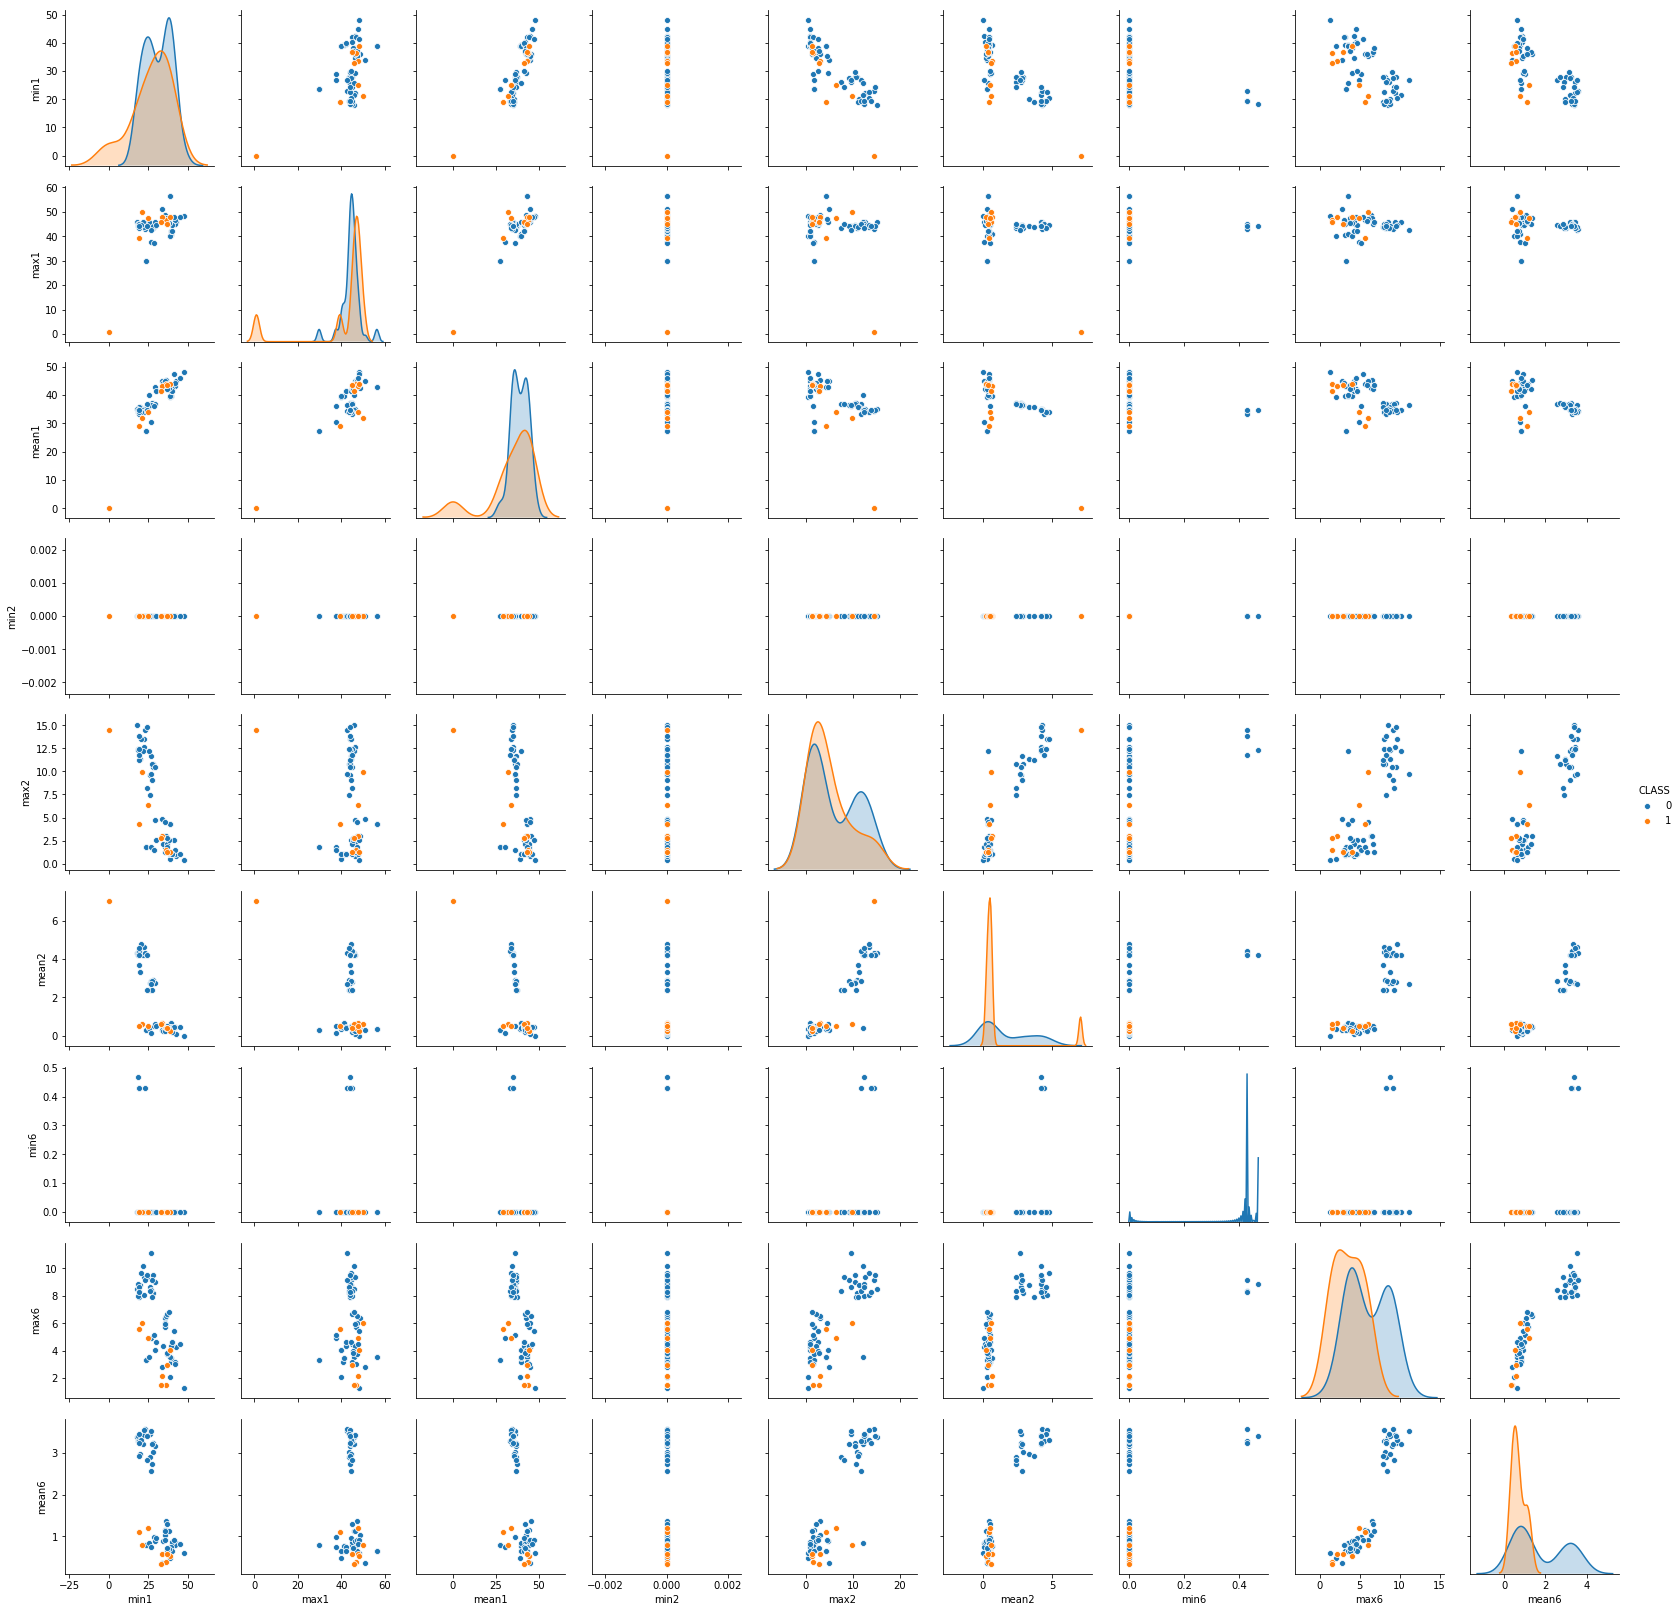

In [26]:

train_bending_class = [1 if i < 10 else 0 for i in range(1, 70)]
final_features_training["CLASS"] = train_bending_class

plt.figure(figsize=(10,10))
sns.pairplot(final_features_training,hue="CLASS",vars=featured_columns_training,diag_kind='kde')
plt.show()

Yes, the there is considerable distance and the split between data is more even and more spread out.

In [27]:
activities=["bending1","bending2","cycling","lying","sitting","standing","walking"]
count=1
it=1
training_features={}
for activity in activities:
    for j in range(0,len(training_set[activity])):
        curr_data=training_set[activity][j]
#         split_data=np.array_split(curr_data,2)
        curr_data1=curr_data[0:240]
        curr_data2=curr_data[240:len(curr_data)]
        
#         curr_data_new=pd.concat([curr_data1,curr_data2],axis=1)
        curr_max=curr_data1.max()
        curr_min=curr_data1.min()
        curr_mean=curr_data1.mean()
        curr_max2=curr_data2.max()
        curr_min2=curr_data2.min()
        curr_mean2=curr_data2.mean()
        ans_list=[]
        for k in range(1,7):
            if k in [1,2,6]:
                ans_list.append(curr_min[k])
                ans_list.append(curr_max[k])
                ans_list.append(curr_mean[k])
        for k in range(1,7):
            if k in [1,2,6]:
                ans_list.append(curr_min2[k])
                ans_list.append(curr_max2[k])
                ans_list.append(curr_mean2[k])

        training_features[it]=ans_list
        it+=1

# print(training_features)   
featured_columns_training=[]
featured_columns_training = ['min11', 'max11', 'mean11', 'min12', 'max12', 'mean12',
                          'min21', 'max21', 'mean21', 'min22', 'max22', 'mean22',
                          'min61', 'max61', 'mean61', 'min62', 'max62', 'mean62']
# featured_columns_training

final_features_training=pd.DataFrame.from_dict(training_features,orient="index",columns=featured_columns_training)
print(final_features_training)

    min11  max11     mean11  min12  max12    mean12  min21  max21    mean21  \
1   36.50  46.50  44.057167    0.0   1.50  0.381042   0.00   1.79  0.598250   
2   33.75  47.75  43.278875    0.0   3.00  0.673292   0.00   1.53  0.640958   
3   33.00  45.75  41.621208    0.0   2.83  0.623083   0.00   1.79  0.419083   
4   39.00  48.00  44.117042    0.0   1.30  0.250042   0.00   5.26  0.815417   
5   36.67  45.00  43.486208    0.0   1.30  0.378667   0.00   2.28  0.524875   
6   21.00  50.00  32.014375    0.0   9.90  0.587875   0.00  13.61  1.538042   
7    0.00   1.00   0.298958    0.0  14.50  7.057208    NaN    NaN       NaN   
8   19.00  39.25  29.189875    0.0   4.33  0.497042   0.00   6.73  1.099792   
9   25.00  47.50  34.110625    0.0   6.38  0.528500   0.00   4.71  0.996250   
10  26.00  44.00  36.183917    0.0   9.65  2.747958   0.00   9.98  3.499458   
11  28.00  43.33  36.506792    0.0  10.85  2.884875   0.00   7.89  3.132708   
12  27.80  44.67  37.063667    0.0  10.50  2.794333 

<Figure size 720x720 with 0 Axes>

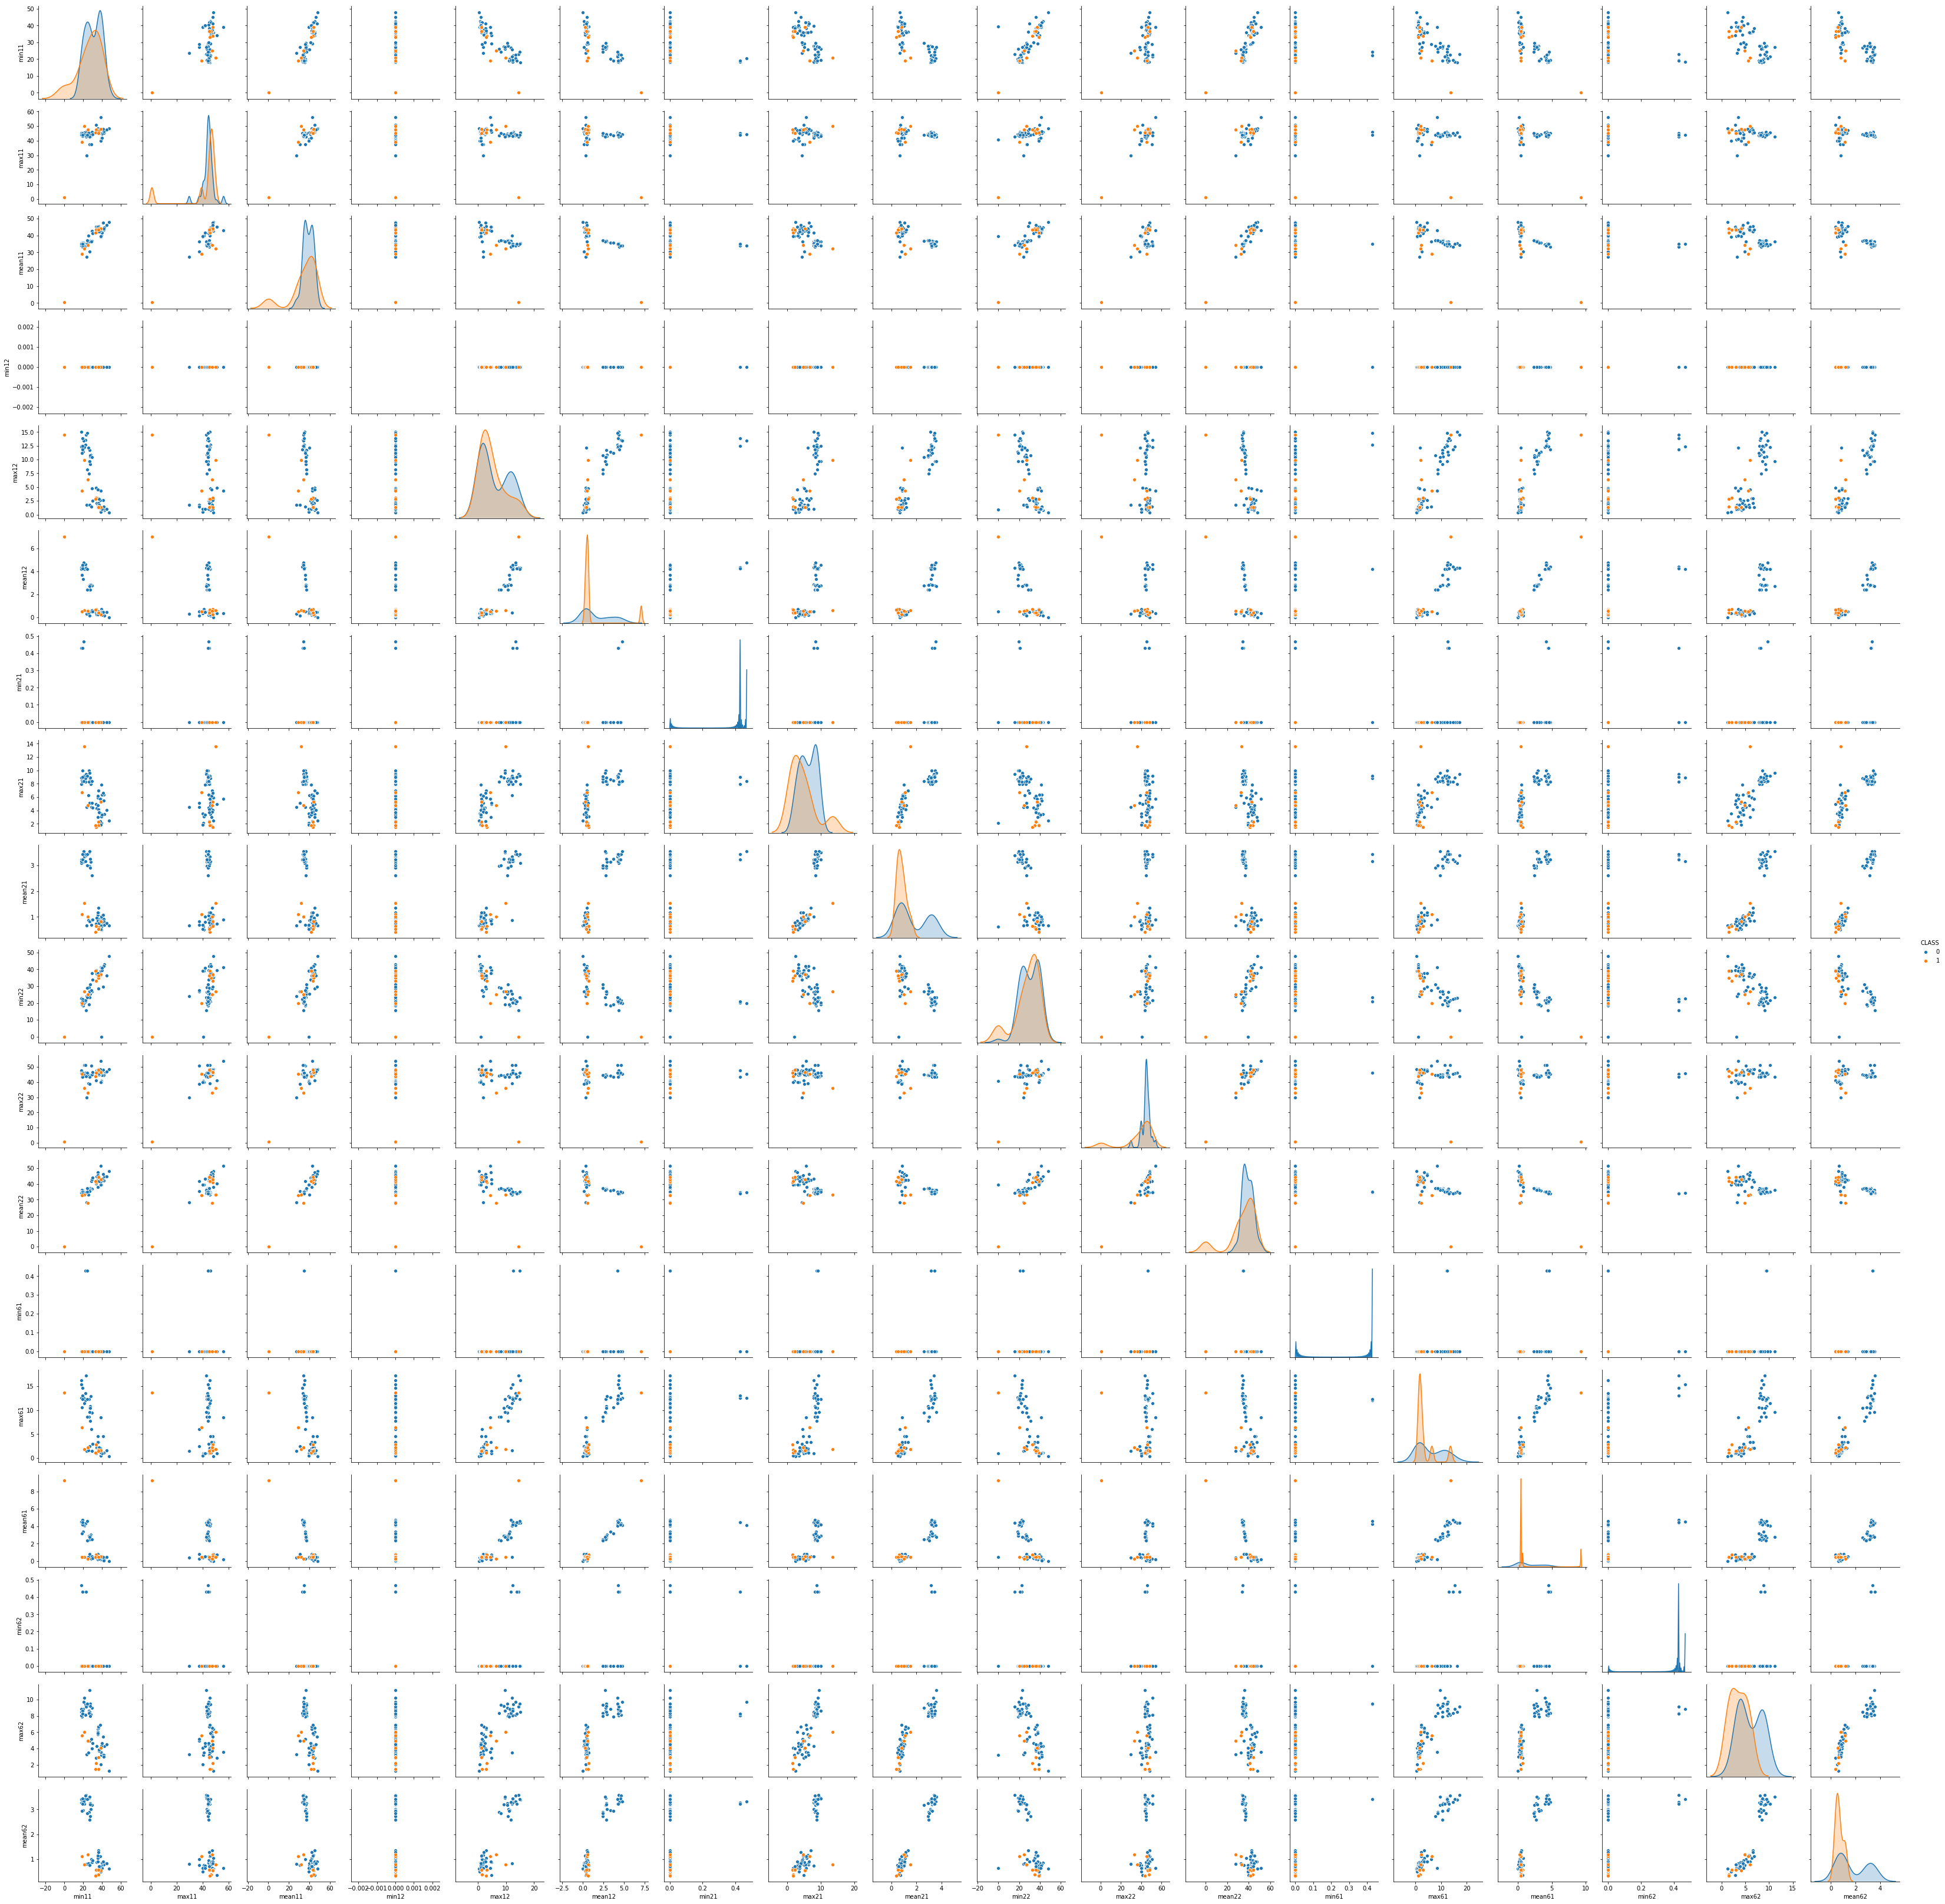

In [28]:
train_bending_class = [1 if i < 10 else 0 for i in range(1, 70)]
final_features_training["CLASS"] = train_bending_class

plt.figure(figsize=(10,10))
sns.pairplot(final_features_training,hue="CLASS",vars=featured_columns_training,diag_kind='kde')
plt.show()

D3
Break each time series in your training set intol∈ {1,2, . . . ,20}time seriesof approximately equal length and use logistic regression5to solve the binaryclassification problem, using time-domain features. Remember that breakingeach of the time series does not change the number of instances. It onlychanges the number of features for each instance. Calculate the p-values foryour logistic regression parameters in each model corresponding to each valueofland refit a logistic regression model using your pruned set of features.6Alternatively, you can use backward selection using sklearn.featureselectionor glm in R. Use 5-fold cross-validation to determine the best value of the pair(l, p), wherepis the number of features used in recursive feature elimination.Explain what the right way and the wrong way are to perform cross-validationin this problem.7Obviously, use the right way! Also, you may encounter theproblem of class imbalance, which may make some of your folds not havingany instances of the rare class. In such a case, you can usestratifiedcrossvalidation.Research what it means and use it if needed.In the following, you can see an example of applying Python’s RecursiveFeature Elimination, which is a backward selection algorithm, to logistic re-gression.

In [29]:
from sklearn.feature_selection import RFECV
test_list = [1,2,8,9,14,15,16,29,30,31,44,45,46,59,60,61,74,75,76]
train_list = [x for x in range(1,89) if x not in test_list]
dict_l_to_numfeatures={}
def getFeatures(data, tmp):
        data_max=data.max()
        data_min=data.min()
        data_mean=data.mean()
        data_median=data.median()
        data_sd=data.std()
        data_fq=data.quantile(0.25)
        data_tq=data.quantile(0.75)
        for j in range(1,7):
            tmp.append(data_max[j])
            tmp.append(data_min[j])
            tmp.append(data_mean[j])
            tmp.append(data_median[j])
            tmp.append(data_sd[j])
            tmp.append(data_fq[j])
            tmp.append(data_tq[j])
        return tmp
def splitData(data,train_index,num_parts):
    chunk_size=int(480/num_parts)
    inst_num=1
    features={}
    for i in train_index:
        values = data[i].values
        currDF=pd.DataFrame(values)
        tmp=[]
        s=0
        e=chunk_size
        for j in range(1,num_parts+1):
            if(e>481):
                continue
            else:
                tmp=getFeatures(currDF.loc[s:e],tmp)
            s=e
            e=e+chunk_size
        features[inst_num]=tmp
        inst_num+=1
    features=pd.DataFrame.from_dict(features,orient="index")
    return features  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
train_bending_class = [1 if i < 10 else 0 for i in range(1, 70)]
score1=[]
chunk_size_list=np.arange(1,21)
chunk_size_to_score=[]
for i in chunk_size_list:
    curr_features=splitData(data,train_list,i)
    curr_features.fillna(0,inplace=True)
    curr_features["CLASS"] = train_bending_class
    clf=LogisticRegression(C=0.0001)
    selector = RFECV(clf,  cv=StratifiedKFold(5), step=1)
    selector.fit(curr_features, train_bending_class)
    selected_features = [x for x in range(0, len(selector.support_)) if selector.support_[x] == True]
    result=clf.fit(curr_features, train_bending_class)
    curr_score=cross_val_score(clf, curr_features.iloc[:,selected_features], train_bending_class)
    score1.append(curr_score.mean())
    dict_l_to_numfeatures[str(i)]=str(np.sum(selector.support_))
best_score=0
best_score_index=0
best_p=0
for i in range(0,len(score1)):
    if(score1[i]>best_score):
        best_score=score1[i]
        best_score_index=i+1
        best_p=dict_l_to_numfeatures[str(i+1)]
print("best score is" ,best_score)
print("best score index (l) is",best_score_index)
print("best P is",best_p)
print("done")

best score is 0.8840579710144927
best score index (l) is 3
best P is 18
done


the wrong way to perform cross validation is to apply it to the classifier using all predictors, the correct way should be to first select the features which are statistically significant and then apply cross validation,
this would yake considerably less amount of time

D(IV)
Report the confusion matrix and show the ROC and AUC for your classifieron train data. Report the parameters of your logistic regressionβi’s as wellas the p-values associated with them

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                   69
Model:                            GLM   Df Residuals:                       50
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:               -0.18900
Date:                Mon, 24 Jun 2019   Deviance:                      0.37800
Time:                        22:34:15   Pearson chi2:                    0.190
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0763      9.682     -0.214      0.830     -21.053      16.900
feature0      -0.8466      3.848     -0.220      0.8

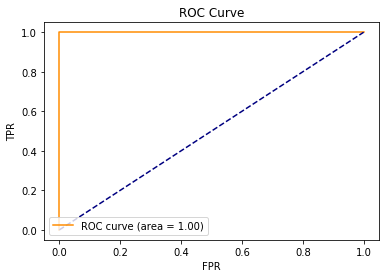

In [30]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

bestFeature=splitData(data,train_list,3)
bestFeature.fillna(0,inplace=True)
bestFeature["CLASS"]=train_bending_class
clf=LogisticRegression(C=0.0001)
selector=RFECV(clf,step=1,cv=5)
selector=selector.fit(bestFeature.iloc[:,:-1],bestFeature.iloc[:,-1])
selected_features = [x for x in range(0, len(selector.support_)) if selector.support_[x] == True]
selected_train_features=bestFeature.iloc[:,:-1].iloc[:,selected_features]
# print(selected_train_features)
f="CLASS ~ "
column_names=["feature"+str(i) for i in range(0,len(selected_features))]

selected_train_features.columns=column_names
selected_train_features["CLASS"]=train_bending_class
for i in range(0,len(column_names)):
    if(i==len(column_names)-1):
        f=f+column_names[i]
    else:
        f=f+column_names[i]+"+"
        
model=smf.glm(formula=f,data=selected_train_features,family=sm.families.Binomial())
result=model.fit(maxiter=5)
print(result.summary())
Y_pred=result.predict(selected_train_features)
mat=confusion_matrix(bestFeature.iloc[:,-1],(Y_pred>0.5).astype(int))
tn=mat[0][0]
fn=mat[1][0]
fp=mat[0][1]
tp=mat[1][1]
print("Bending\t\t| "+str(tp)+"\t\t\t| "+str(fn))
print("Not Bending\t| "+str(fp) +"\t\t\t| "+str(tn))

f,t,th= roc_curve(bestFeature.iloc[:,-1],Y_pred)
print("\nThe ROC curve for l = 3 is as follows, and the AUC = %.2f"% auc(f,t))
plt.figure()
plt.plot(f, t, color='darkorange', label='ROC curve (area = %0.2f)' % auc(f,t))
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower left")
plt.show()

D(V)
Test the classifier on the test set. Remember to break the time series inyour test set into the same number of time series into which you broke yourtraining set. Remember that the classifier has to be tested using the featuresextracted from the test set. Compare the accuracy on the test set with thecross-validation accuracy you obtained previously

In [31]:

score=[]
testFeature=splitData(data,test_list,3)
test_bending_class = [1 if i < 5 else 0 for i in range(1, testFeature.shape[0]+1)]
testFeature.fillna(0,inplace=True)
testFeature["CLASS"]=test_bending_class
clf=LogisticRegression(C=0.0001)
selector = RFECV(clf,  cv=StratifiedKFold(5), step=1)
#feature selection for test data
selector=selector.fit(testFeature.iloc[:,:-1],testFeature.iloc[:,-1])
selected_features = [x for x in range(0, len(selector.support_)) if selector.support_[x] == True]
#fitting on train data
clf.fit(bestFeature.iloc[:,:-1],bestFeature.iloc[:,-1])
# testing on test data with limited features
curr_score=cross_val_score(clf,testFeature.iloc[:,:-1].iloc[:,selected_features],testFeature.iloc[:,-1], test_bending_class)
score.append(curr_score.mean())
print("TEST SCORE ACCURACY",score[0])
print("TRAIN SCORE ACCURACY" ,best_score)
print("TEST ACCURACY IS LESS THAN TRAIN ACCURACY")

TEST SCORE ACCURACY 0.7936507936507936
TRAIN SCORE ACCURACY 0.8840579710144927
TEST ACCURACY IS LESS THAN TRAIN ACCURACY


D(VI)
Do your classes seem to be well-separated to cause instability in calculatinglogistic regression parameters?
Ans.
The classes are well separated with some p values being very high indicating instability int the model

D(VII)
From the confusion matrices you obtained, do you see imbalanced classes?If yes, build a logistic regression model based on case-control sampling andadjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Yes, the classes are imbalanced

In [32]:
from imblearn.over_sampling import SMOTE 
smote=SMOTE()

Bending		| 60			| 0
Not Bending	| 0			| 60

The ROC curve for l = 3 is as follows, and the AUC = 1.00


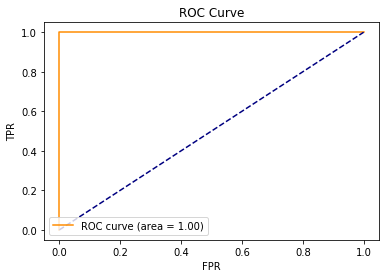

In [33]:
Xtrain,Ytrain=smote.fit_sample(bestFeature.iloc[:,:-1],bestFeature.iloc[:,-1])
Xtrain=pd.DataFrame(Xtrain)
Ytrain=pd.DataFrame(Ytrain)
clf=LogisticRegression(C=0.01)
selector=RFECV(clf,step=1,cv=5)
selector=selector.fit(Xtrain,Ytrain)
selected_features = [x for x in range(0, len(selector.support_)) if selector.support_[x] == True]
clf.fit(Xtrain.iloc[:,selected_features],Ytrain)
ans=clf.predict(Xtrain.iloc[:,selected_features])
mat=confusion_matrix(Ytrain,(ans>0.5).astype(int))
tn=mat[0][0]
fn=mat[1][0]
fp=mat[0][1]
tp=mat[1][1]
print("Bending\t\t| "+str(tp)+"\t\t\t| "+str(fn))
print("Not Bending\t| "+str(fp) +"\t\t\t| "+str(tn))

f,t,th= roc_curve(Ytrain,ans)
print("\nThe ROC curve for l = 3 is as follows, and the AUC = %.2f"% auc(f,t))
plt.figure()
plt.plot(f, t, color='darkorange', label='ROC curve (area = %0.2f)' % auc(f,t))
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower left")
plt.show()

E.Binary Classification UsingL1-penalized logistic regressioni.
E(I)
Repeat 1(d)iii usingL1-penalized logistic regression,8i.e. instead of using p-values for variable selection, useL1regularization. Note that in this problem,you have to cross-validate for bothl, the number of time series into which youbreak each of your instances, andλ, the weight ofL1penalty in your logisticregression objective function (orC, the budget). Packages usually performcross-validation forλautomatically

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
train_bending_class = [1 if i < 10 else 0 for i in range(1, 70)]
score2=[]
chunk_size_list=np.arange(1,21)
chunk_size_to_score=[]
for i in chunk_size_list:
    curr_features=splitData(data,train_list,i)
    curr_features.fillna(0,inplace=True)
#     curr_features["CLASS"] = train_bending_class
    clf=LogisticRegressionCV(cv=5,penalty="l1",solver="liblinear")
    curr_score=cross_val_score(clf, curr_features, train_bending_class)
    score2.append(curr_score.mean())
    dict_l_to_numfeatures[str(i)]=str(np.sum(selector.support_))
best_score=0
best_score_index=0
best_p=0
for i in range(0,len(score2)):
    if(score2[i]>best_score):
        best_score=score2[i]
        best_score_index=i+1
        best_p=dict_l_to_numfeatures[str(i+1)]
print("best score is" ,best_score)
print("best score index (l) is",best_score_index)
print("best P is",best_p)
print("done")

best score is 0.9565217391304349
best score index (l) is 4
best P is 5
done


In [35]:
for i in range(0,len(score1)):
    print(i," ",score1[i]," ",score2[i])
print("L1 penalized logistic regression performs better than p value variable selection logistic regression")
print("L1 penalized logistic regression is easier to implement")

0   0.8695652173913043   0.9420289855072465
1   0.8695652173913043   0.9420289855072465
2   0.8840579710144927   0.9420289855072465
3   0.8840579710144927   0.9565217391304349
4   0.8840579710144927   0.9420289855072465
5   0.8840579710144927   0.8985507246376812
6   0.8695652173913043   0.927536231884058
7   0.8840579710144927   0.9420289855072465
8   0.8840579710144927   0.9420289855072465
9   0.8695652173913043   0.927536231884058
10   0.8695652173913043   0.927536231884058
11   0.8840579710144927   0.927536231884058
12   0.8840579710144927   0.927536231884058
13   0.8840579710144927   0.927536231884058
14   0.8840579710144927   0.9130434782608695
15   0.8840579710144927   0.9130434782608695
16   0.8840579710144927   0.9130434782608695
17   0.8840579710144927   0.9420289855072465
18   0.8840579710144927   0.927536231884058
19   0.8840579710144927   0.927536231884058
L1 penalized logistic regression performs better than p value variable selection logistic regression
L1 penalized logi

F.Multi-class Classification (The Realistic Case)
F(I).Find the best l in the same way as you found it in 1(e)i to build anL1-penalized multinomial regression model to classify all activities in your train-ing set.10Report your test error. Research how confusion matrices and ROC

In [54]:
multi_class=[]
best_score_multiReg=0
best_score_index_multiReg=0
for i in range(1,70):
    if i < 10:
        multi_class.append(1)
    elif i < 22:
        multi_class.append(2)
    elif i < 34:
        multi_class.append(3)
    elif i < 46:
        multi_class.append(4)
    elif i < 58:
        multi_class.append(5)
    else:
        multi_class.append(6)
score_multiReg=[]
for i in range(1,21):
    curr_feature=splitData(data,train_list,i)
    curr_test_feature=splitData(data,test_list,i)
    curr_feature.fillna(0,inplace=True)
    curr_test_feature.fillna(0,inplace=True)
    clf=LogisticRegressionCV(cv=5,penalty="l1",solver="saga",multi_class="multinomial")
    curr_score=cross_val_score(clf, curr_feature, multi_class)
    score_multiReg.append(curr_score.mean())
    if(score_multiReg[i-1]>best_score_multiReg):
        best_score_multiReg=score_multiReg[i-1]
        best_score_index_multiReg=i

print("best score is" ,best_score_multiReg)
print("best score index (l) is",best_score_index_multiReg)


best score is 0.8115942028985508
best score index (l) is 1


In [55]:
multi_train_feature = splitData(data,train_list,1)
multi_class = []
for i in range(1,70):
    if i < 10:
        multi_class.append(1)
    elif i < 22:
        multi_class.append(2)
    elif i < 34:
        multi_class.append(3)
    elif i < 46:
        multi_class.append(4)
    elif i < 58:
        multi_class.append(5)
    else:
        multi_class.append(6)

        
xtrain, xtest, ytrain, ytest = train_test_split(multi_train_feature, multi_class, test_size=.3,random_state=0)
xtrain.fillna(0,inplace=True)

In [57]:
model =LogisticRegressionCV(cv=5,penalty="l1",solver="saga",multi_class="multinomial")
result =model.fit(xtrain,ytrain)
ypred =model.predict(xtest)

mat= confusion_matrix(ytest, ypred)
print(mat)
print("In the test error, 4 classes have been mis-classified")


[[1 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 6 0 0 0]
 [0 1 2 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]
In the test error, 4 classes have been mis-classified


F(II).Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi-nomial priors and compare the results

In [40]:
multi_class_test=[]
best_score_gaussian=0
best_score_index_gaussian=0
for i in range(1,70):
    if i < 10:
        multi_class_test.append(1)
    elif i < 22:
        multi_class_test.append(2)
    elif i < 34:
        multi_class_test.append(3)
    elif i < 46:
        multi_class_test.append(4)
    elif i < 58:
        multi_class_test.append(5)
    else:
        multi_class_test.append(6)
score_gaussian=[]
for i in range(1,21):
    curr_feature=splitData(data,train_list,i)
    curr_test_feature=splitData(data,test_list,i)
    curr_feature.fillna(0,inplace=True)
    curr_test_feature.fillna(0,inplace=True)
    clf=GaussianNB()
    curr_score=cross_val_score(clf, curr_feature, multi_class)
    score_gaussian.append(curr_score.mean())
    if(score_gaussian[i-1]>best_score_gaussian):
        best_score_gaussian=score_gaussian[i-1]
        best_score_index_gaussian=i

print("best score is" ,best_score_gaussian)
print("best score index (l) is",best_score_index_gaussian)

best score is 0.8115942028985508
best score index (l) is 2


In [47]:
multi_train_feature = splitData(data,train_list,2)
multi_class = []
for i in range(1,70):
    if i < 10:
        multi_class.append(1)
    elif i < 22:
        multi_class.append(2)
    elif i < 34:
        multi_class.append(3)
    elif i < 46:
        multi_class.append(4)
    elif i < 58:
        multi_class.append(5)
    else:
        multi_class.append(6)

        
xtrain, xtest, ytrain, ytest = train_test_split(multi_train_feature, multi_class, test_size=.3,random_state=0)
xtrain.fillna(0,inplace=True)
model =GaussianNB()
result =model.fit(xtrain,ytrain)
ypred =model.predict(xtest)

mat= confusion_matrix(ytest, ypred)
print(mat)
print("In the test error, 4 classes have been mis-classified")


[[2 0 0 0 0]
 [2 4 0 0 0]
 [0 0 5 0 0]
 [0 0 1 1 0]
 [1 0 0 0 5]]
In the test error, 4 classes have been mis-classified


In [48]:

best_score_mult=0
best_score_index_mult=0
for i in range(1,70):
    if i < 10:
        multi_class_test.append(1)
    elif i < 22:
        multi_class_test.append(2)
    elif i < 34:
        multi_class_test.append(3)
    elif i < 46:
        multi_class_test.append(4)
    elif i < 58:
        multi_class_test.append(5)
    else:
        multi_class_test.append(6)
score_gaussian=[]
for i in range(1,21):
    curr_feature=splitData(data,train_list,i)
    curr_test_feature=splitData(data,test_list,i)
    curr_feature.fillna(0,inplace=True)
    curr_test_feature.fillna(0,inplace=True)
    clf=MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    curr_score=cross_val_score(clf, curr_feature, multi_class)
    score_gaussian.append(curr_score.mean())
    if(score_gaussian[i-1]>best_score_mult):
        best_score_mult=score_gaussian[i-1]
        best_score_index_mult=i

print("best score is" ,best_score_mult)
print("best score index (l) is",best_score_index_mult)
    

best score is 0.7826086956521738
best score index (l) is 2


In [50]:
multi_train_feature = splitData(data,train_list,2)
multi_class = []
for i in range(1,70):
    if i < 10:
        multi_class.append(1)
    elif i < 22:
        multi_class.append(2)
    elif i < 34:
        multi_class.append(3)
    elif i < 46:
        multi_class.append(4)
    elif i < 58:
        multi_class.append(5)
    else:
        multi_class.append(6)

        
xtrain, xtest, ytrain, ytest = train_test_split(multi_train_feature, multi_class, test_size=.3,random_state=0)
xtrain.fillna(0,inplace=True)
model =MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
result =model.fit(xtrain,ytrain)
ypred =model.predict(xtest)

mat= confusion_matrix(ytest, ypred)
print(mat)
print("In the test error, 6 classes have been mis-classified")


[[0 0 2 0 0]
 [0 5 0 1 0]
 [0 1 3 1 0]
 [0 0 1 1 0]
 [0 0 0 0 6]]
In the test error, 6 classes have been mis-classified


In [51]:
print("Gaussian priors performs better than Multinomial prior in this case ")

Gaussian priors performs better than Multinomial prior in this case 


F(III)
Which method is better for multi-class classification in this problem ?

Logistic regression classification performs better than Naive Bayes classifier in this test case.

In [12]:


import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statistics
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from matplotlib.ticker import MultipleLocator
from itertools import cycle
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

ISLR 3.7.4

a) I would expect the polynomial regression to have a lower training RSS
than the linear regression because it would make a tighter fit against data that
matched with a broader irreducible error.

(b) Converse to (a), I would expect the polynomial regression to have a higher
test RSS as the overfit from training would give more error than the linear
regression.

(c) Polynomial regression has lower train RSS than the linear fit because of
higher flexibility: no matter what the underlying true relationshop is the
more flexible model will closer follow points and reduce train RSS.

(d) There is not enough information to tell which test RSS would be lower
for either regression given the problem statement is defined as not knowing
"how far it is from linear". If it is closer to linear than cubic, the linear
regression test RSS could be lower than the cubic regression test RSS and vice versa It is due to
bias-variance tradeoff.

ISLR 4.7.4

a)On average, 10%. For simplicity, ignoring cases when X < 0.05 and X > 0.95.

b)On average, 1%

c)On average, (0.10^100)∗100=10^(−98)%.

d)As p increases linear, observations that are geometrically near decrease exponentially.

e)p=1,l=0.10
p=2,l=0.10^(1/2) 0.32
p=3,l=0.10^(1/3) 0.46...
p=N,l=0.10^(1/N)

ISLR 4.7.7

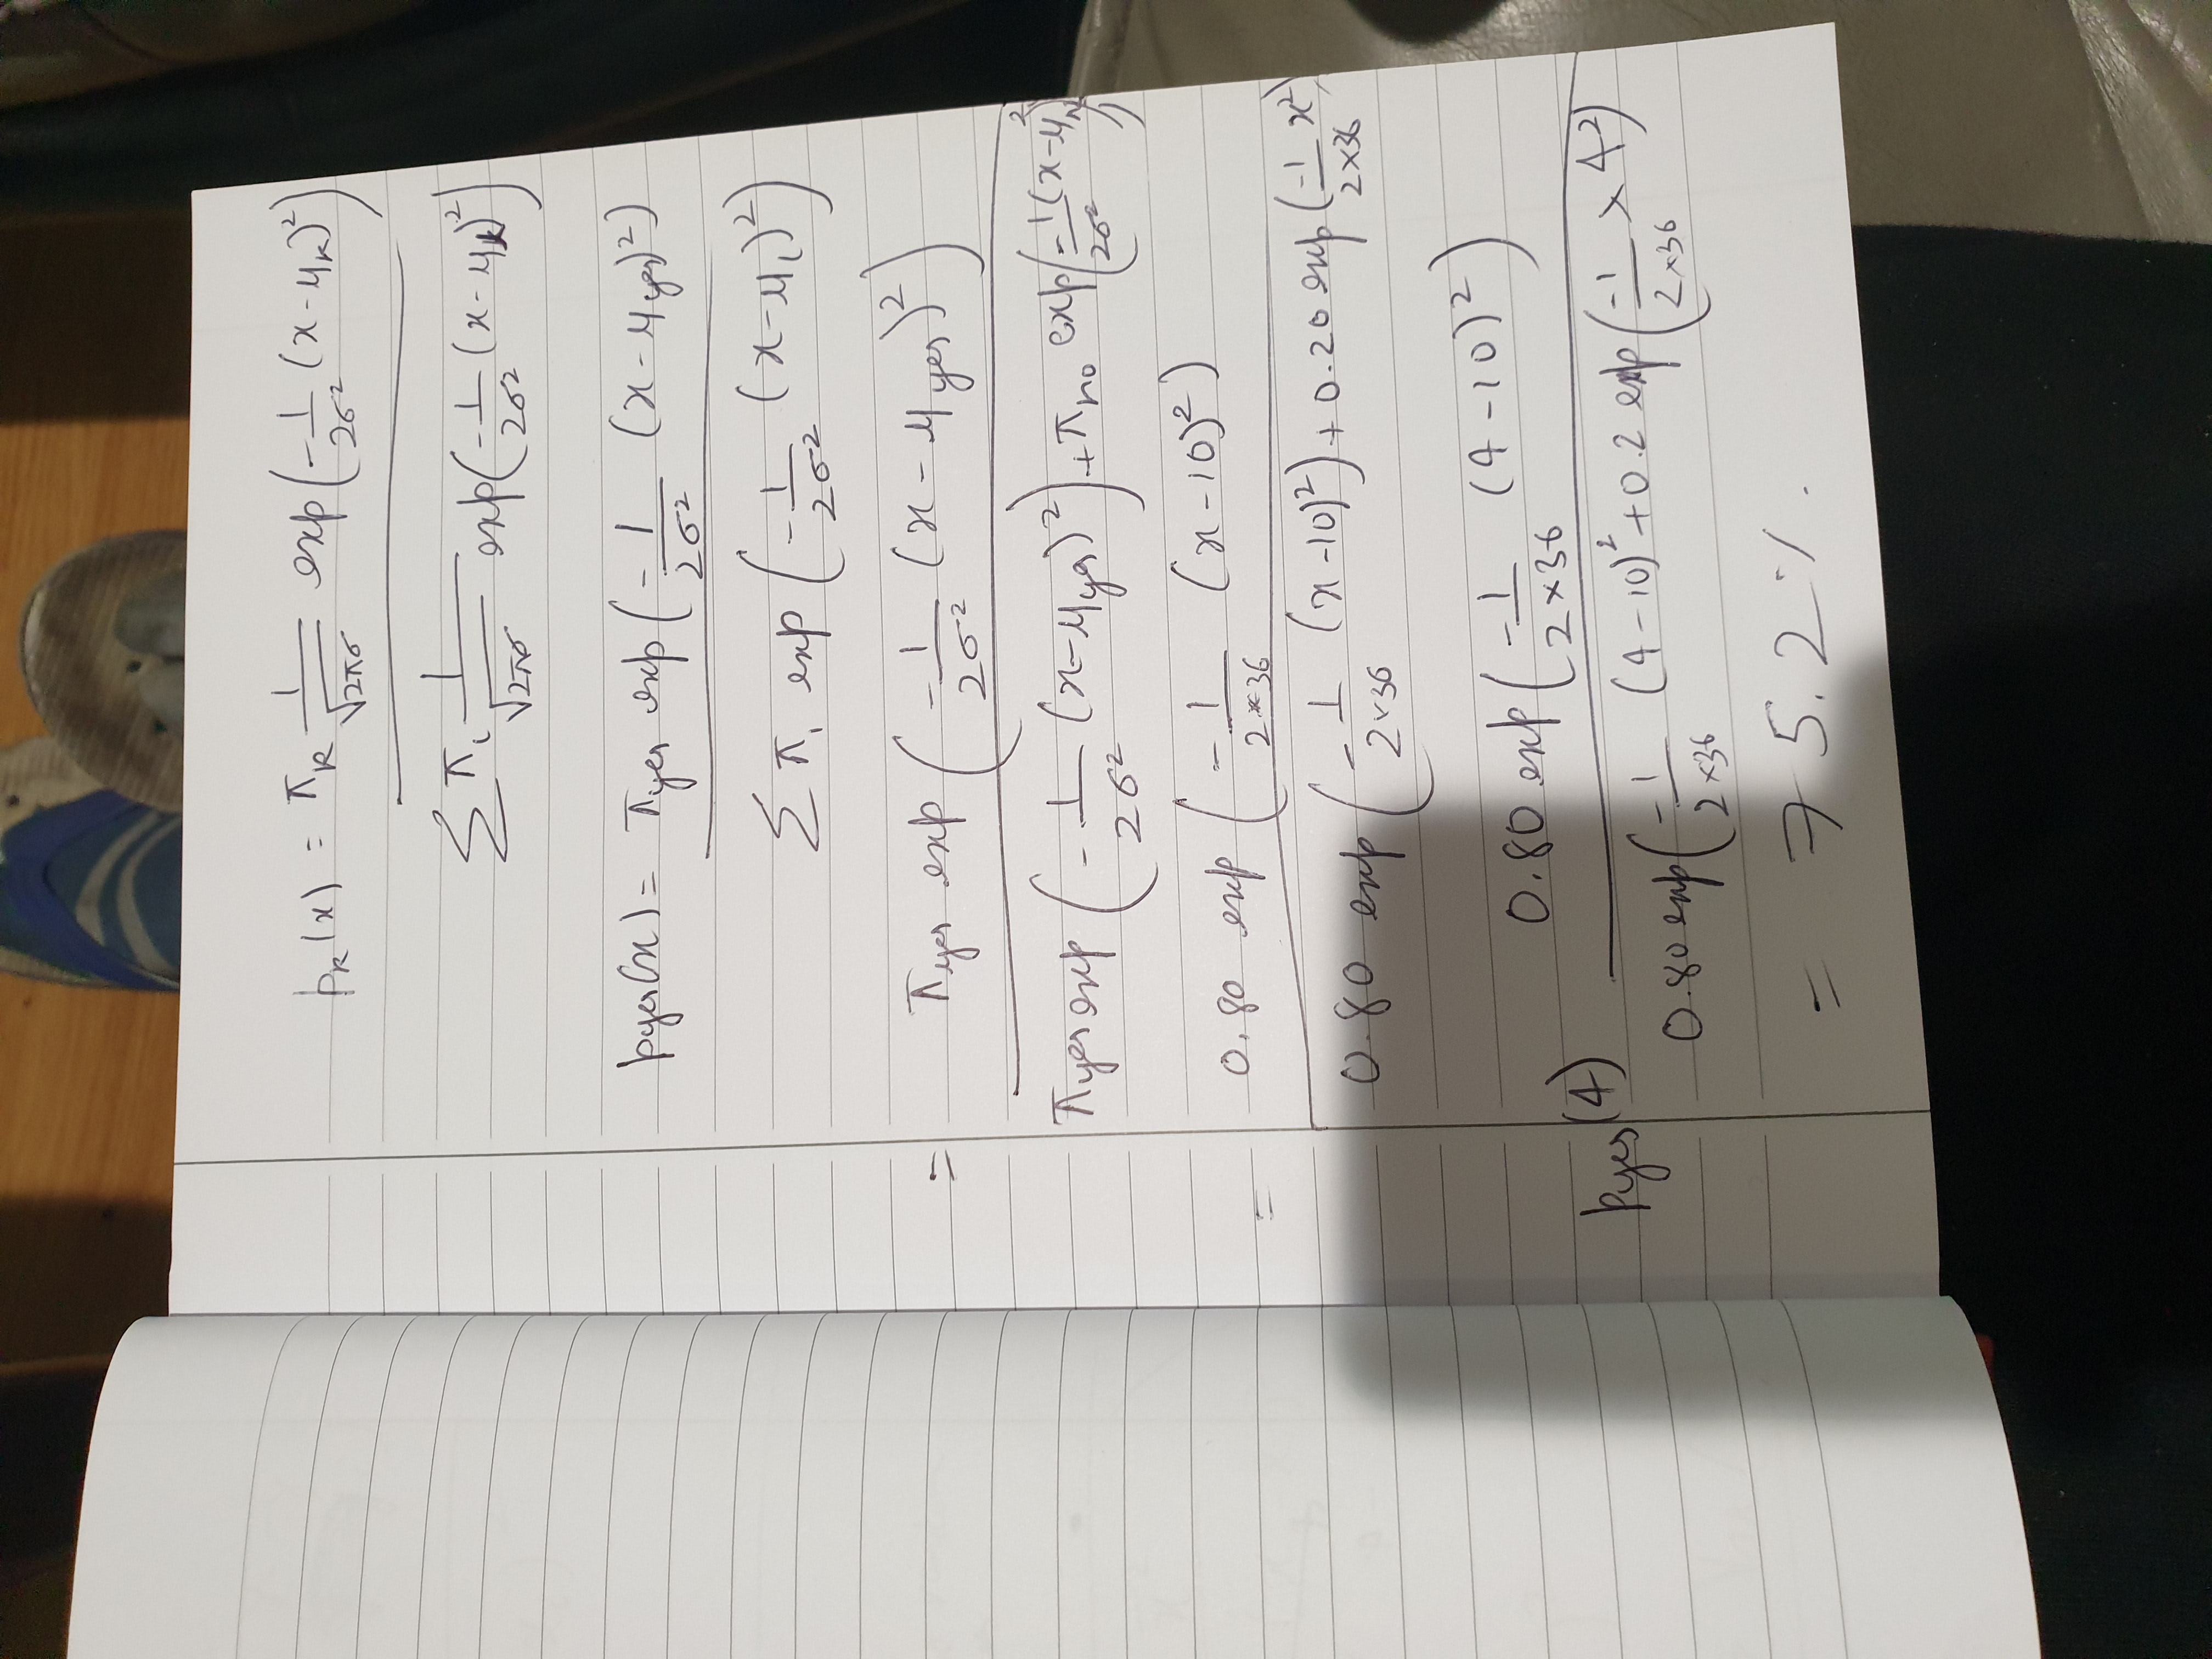
